# Import Libraries

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [187]:
# Load the latest version
# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv",  # The actual file path within the dataset
)

/tmp/ipykernel_138712/1127198705.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [188]:
print("First 5 records:", df.head())

First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

# Data Preprocessing

In [189]:
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())


Dataset shape: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null 

In [190]:
# Check for null values
print("\n Null values per column:")
print(df.isnull().sum())


 Null values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

In [191]:
# Percentage of missing values
print("\n Percentage of missing values per column:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])  # Only show columns with missing values


 Percentage of missing values per column:
Unnamed: 32    100.0
dtype: float64


In [192]:
# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Total missing values in dataset: 569


In [193]:
# Rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {rows_with_missing}")


Number of rows with at least one missing value: 569


In [194]:
# Summary statistics
print("\nDataset Summary:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")


Dataset Summary:
   Total rows: 569
   Total columns: 33
   Total cells: 18777
   Missing cells: 569
   Missing percentage: 3.03%


In [ ]:

# Display columns with missing values (if any)
cols_with_missing = df.columns[df.isnull().any()].tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo columns have missing values!")


Columns with missing values: ['Unnamed: 32']


In [ ]:
#Check for empty strings or whitespace (in object columns)
print("\nChecking for empty strings in text columns:")
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_strings = (df[col] == '').sum()
    whitespace = df[col].str.isspace().sum() if df[col].dtype == 'object' else 0
    if empty_strings > 0 or whitespace > 0:
        print(f"   {col}: {empty_strings} empty strings, {whitespace} whitespace-only")


Checking for empty strings in text columns:


In [ ]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

In [ ]:
# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset after preprocessing: {total_missing}")


Total missing values in dataset after preprocessing: 0


In [ ]:

# Summary statistics
print("\nDataset Summary after preprocessing:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")


Dataset Summary after preprocessing:
   Total rows: 569
   Total columns: 32
   Total cells: 18208
   Missing cells: 0
   Missing percentage: 0.00%


In [200]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values
y_binary = (y == 'M').astype(int)  # Convert to binary: 1=Malignant, 0=Benign

In [201]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Verify scaling
print("\nFirst 5 records after scaling:")
print(X_scaled[:5])
print("\nScaled dataset shape:", X_scaled.shape)


First 5 records after scaling:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388

# 1.PCA

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # 1. Center data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # 4. Sort eigenvalues & eigenvectors (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # 5. Select top components
        self.components = eigenvectors[:, :self.n_components]

        # 6. Explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_pca):
        return np.dot(X_pca, self.components.T) + self.mean

    def reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        return np.mean((X - X_reconstructed) ** 2)

In [204]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
error = pca.reconstruction_error(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Reconstruction error:", error)

Explained variance ratio: [0.44272026 0.18971182]
Reconstruction error: 0.3675679234844056


# 2.Autoencoders

In [205]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [ ]:
class Autoencoder:
    def __init__(self, layer_sizes, activation='relu', lr=0.01, l2=0.001):
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.l2 = l2

        self.activations = {
            'relu': (relu, relu_derivative),
            'sigmoid': (sigmoid, sigmoid_derivative),
            'tanh': (tanh, tanh_derivative)
        }

        self.activation, self.activation_derivative = self.activations[activation]

        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            self.weights.append(
                np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            )
            self.biases.append(np.zeros((1, layer_sizes[i+1])))

    def forward(self, X):
        self.zs = []
        self.activations_cache = [X]

        for W, b in zip(self.weights, self.biases):
            z = np.dot(self.activations_cache[-1], W) + b
            self.zs.append(z)
            a = self.activation(z)
            self.activations_cache.append(a)

        return self.activations_cache[-1]

    def backpropagation(self, X):
        m = X.shape[0]
        grads_W = []
        grads_b = []

        # MSE loss derivative
        delta = (self.activations_cache[-1] - X) * self.activation_derivative(self.zs[-1])

        for i in reversed(range(len(self.weights))):
            dW = np.dot(self.activations_cache[i].T, delta) / m
            db = np.mean(delta, axis=0, keepdims=True)

            # L2 regularization
            dW += self.l2 * self.weights[i]

            grads_W.insert(0, dW)
            grads_b.insert(0, db)

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_derivative(self.zs[i-1])

        return grads_W, grads_b

    def update(self, grads_W, grads_b):
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * grads_W[i]
            self.biases[i] -= self.lr * grads_b[i]

    def train(self, X, epochs=100, batch_size=32, decay=0.99):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                self.forward(X_batch)
                grads_W, grads_b = self.backpropagation(X_batch)
                self.update(grads_W, grads_b)

            self.lr *= decay  # learning rate scheduling

            if epoch % 10 == 0:
                loss = np.mean((self.forward(X) - X) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.5f}")

In [207]:
layer_sizes = [30, 20, 10, 2, 10, 20, 30]
ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)

ae.train(X_scaled, epochs=200, batch_size=32)

Epoch 0, Loss: 1.00000


Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.00000
Epoch 180, Loss: 1.00000
Epoch 190, Loss: 1.00000


# 3.K-Means

In [208]:

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    # #setting K
    # K = centroids.shape[0]

    # idx = np.zeros(X.shape[0], dtype=int)

    # for i in range (X.shape[0]):
    #     distance=[]
    #     for j in range(centroids.shape[0]):
    #         norm_ij= np.linalg.norm(X[i] - centroids[j]) 
    #         distance.append(norm_ij)
    #     idx[i]=np.argmin(distance)        
            
            
    # return idx


#with vectorization
    # Compute squared distances
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [209]:

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:  # Handle empty clusters
            centroids[k] = np.mean(points, axis=0)
        else:
            # Reinitialize empty cluster to a random point
            centroids[k] = X[np.random.choice(m)]
    
    return centroids

 

In [210]:
def compute_inertia(X, idx, centroids):
    return np.sum((X - centroids[idx]) ** 2)


In [211]:

def kMeans_init_centroids_random(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids



In [212]:

def kMeans_init_centroids_plusplus(X, K):
    """
    Initialize K centroids using K-Means++ algorithm
    
    Args:
        X (ndarray): (m, n) Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): (K, n) Initialized centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    # Step 1: Choose first centroid randomly
    centroids[0] = X[np.random.choice(m)]
    
    # Step 2: Choose remaining centroids
    for k in range(1, K):
        # Compute distances to nearest centroid for each point
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids[:k]]) for x in X])
        
        # Choose next centroid with probability proportional to distance squared
        probabilities = distances / distances.sum()
        cumulative_probs = probabilities.cumsum()
        r = np.random.rand()
        
        for idx, prob in enumerate(cumulative_probs):
            if r < prob:
                centroids[k] = X[idx]
                break
    
    return centroids


In [213]:
   
def run_kMeans(X, initial_centroids, max_iters=100, epsilon=1e-4, verbose=True):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m,dtype=int )
    inertia_history = []


    # Run K-Means
    for i in range(max_iters):
        if verbose:
            print(f"K-Means iteration {i+1}/{max_iters}")
        
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Compute inertia (WCSS) (within-cluster sum of squares)
        inertia = compute_inertia(X, idx, centroids)
        inertia_history.append(inertia)

        new_centroids = compute_centroids(X, idx, K)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"  Inertia: {inertia:.4f}, Centroid shift: {centroid_shift:.6f}")


        if centroid_shift < epsilon:
            if verbose:
                print(f"Converged at iteration {i+1}")
            centroids = new_centroids
            return centroids, idx,inertia_history,i+1
        
        centroids = new_centroids
    if verbose:
        print(f"Reached maximum iterations ({max_iters})")
    return centroids, idx,inertia_history,max_iters
    



In [214]:
k_vals = list(range(2, 11))   # K values to test
n_runs = 10                   # runs per K
max_iters = 100
random_state = 42
inertias = []
np.random.seed(random_state)

# Store results
inertia_means_random = []
inertia_stds_random = []
iters_means_random = []
iters_stds_random = []
silhouette_scores_random = []

inertia_means_plusplus = []
inertia_stds_plusplus = []
iters_means_plusplus = []
iters_stds_plusplus = []
silhouette_scores_plusplus = []

gap_values = []  # Gap statistic


In [215]:
def compute_gap_statistic(X, K, n_refs=5):
    # Generate reference datasets
    ref_inertia = []
    for _ in range(n_refs):
        X_ref = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
        centroids = kMeans_init_centroids_plusplus(X_ref, K)
        _, _, inertia_hist, _ = run_kMeans(X_ref, centroids, max_iters=max_iters, verbose=False)
        ref_inertia.append(inertia_hist[-1])
    # Compute original dataset inertia
    centroids = kMeans_init_centroids_plusplus(X, K)
    _, _, inertia_hist, _ = run_kMeans(X, centroids, max_iters=max_iters, verbose=False)
    return np.log(np.mean(ref_inertia)) - np.log(inertia_hist[-1])

In [216]:
for K in k_vals:
    random_inertia = []
    random_iters = []
    random_sil = []

    plusplus_inertia = []
    plusplus_iters = []
    plusplus_sil = []

    for run in range(n_runs):
        # --- Random Initialization ---
        centroids = kMeans_init_centroids_random(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        random_inertia.append(inertia_hist[-1])
        random_iters.append(n_iters)
        random_sil.append(silhouette_score(X_scaled, idx))

        # --- K-Means++ Initialization ---
        centroids = kMeans_init_centroids_plusplus(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        plusplus_inertia.append(inertia_hist[-1])
        plusplus_iters.append(n_iters)
        plusplus_sil.append(silhouette_score(X_scaled, idx))

    # Aggregate results
    inertia_means_random.append(np.mean(random_inertia))
    inertia_stds_random.append(np.std(random_inertia))
    iters_means_random.append(np.mean(random_iters))
    iters_stds_random.append(np.std(random_iters))
    silhouette_scores_random.append(np.mean(random_sil))

    inertia_means_plusplus.append(np.mean(plusplus_inertia))
    inertia_stds_plusplus.append(np.std(plusplus_inertia))
    iters_means_plusplus.append(np.mean(plusplus_iters))
    iters_stds_plusplus.append(np.std(plusplus_iters))
    silhouette_scores_plusplus.append(np.mean(plusplus_sil))

    # Gap statistic
    gap = compute_gap_statistic(X_scaled, K)
    gap_values.append(gap)

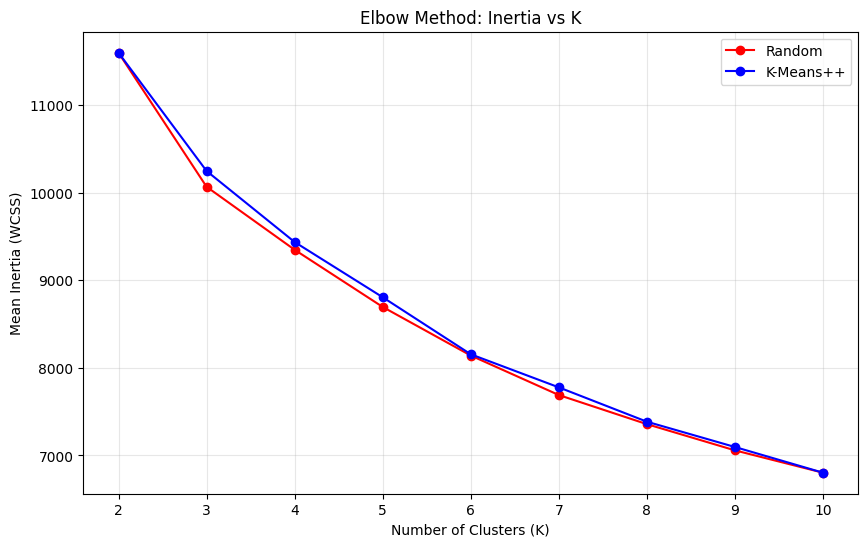

In [217]:
# Elbow method
plt.figure(figsize=(10,6))
plt.plot(k_vals, inertia_means_random, 'ro-', label='Random')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia (WCSS)')
plt.title('Elbow Method: Inertia vs K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

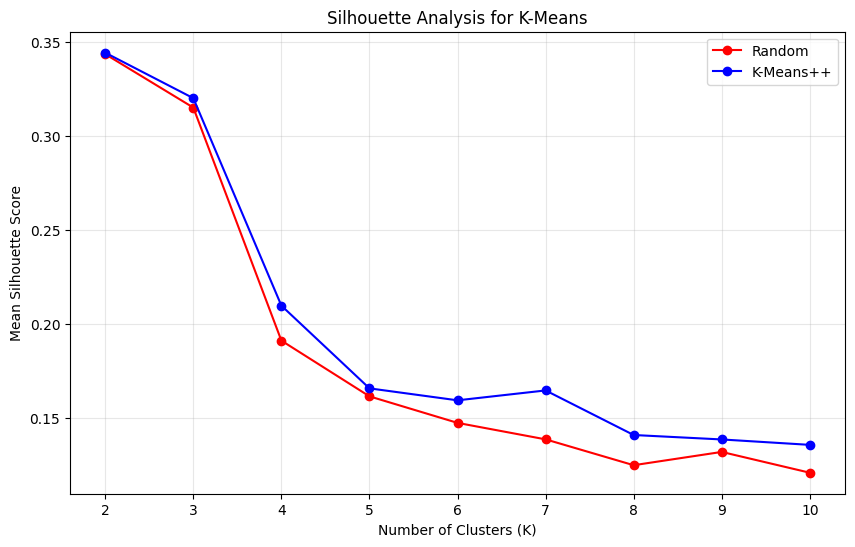

In [218]:
# Silhouette Analysis
plt.figure(figsize=(10,6))
plt.plot(k_vals, silhouette_scores_random, 'ro-', label='Random')
plt.plot(k_vals, silhouette_scores_plusplus, 'bo-', label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

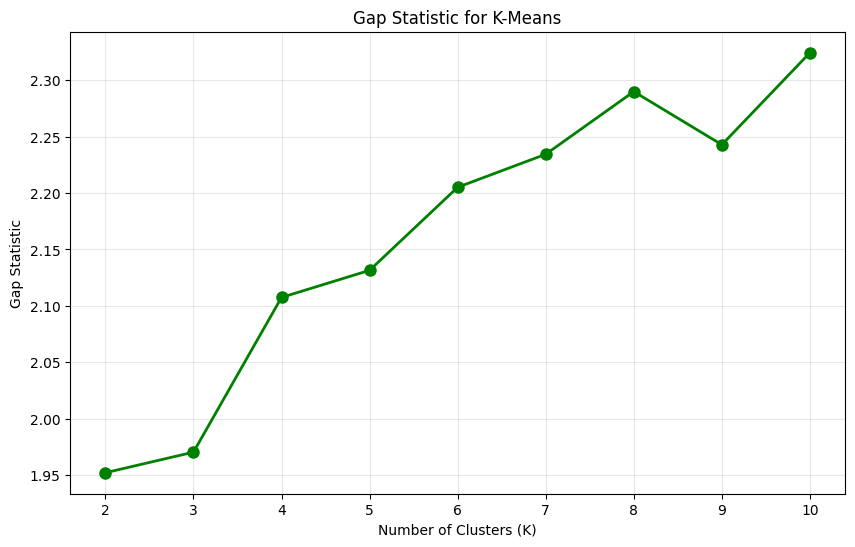

In [219]:
# Gap Statistic
plt.figure(figsize=(10,6))
plt.plot(k_vals, gap_values, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for K-Means')
plt.grid(True, alpha=0.3)
plt.show()

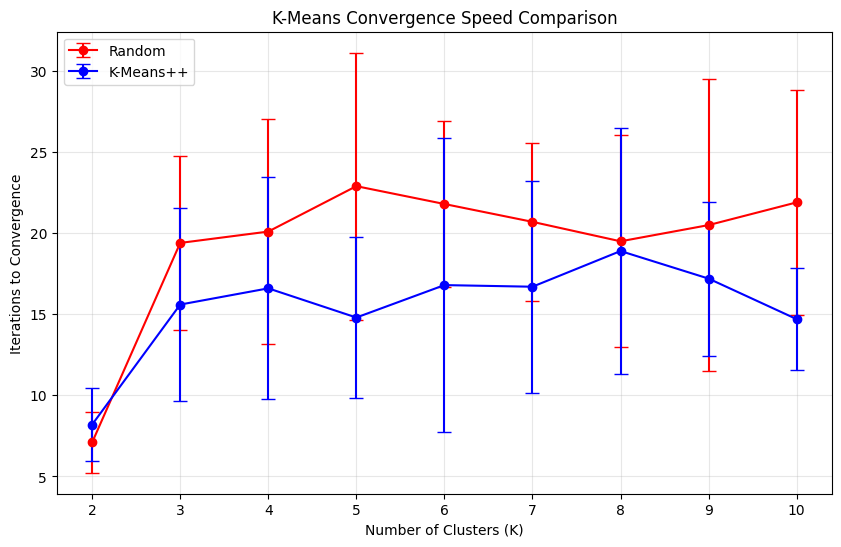

In [220]:
# Convergence speed comparison (iterations)
plt.figure(figsize=(10,6))
plt.errorbar(k_vals, iters_means_random, yerr=iters_stds_random, fmt='ro-', capsize=5, label='Random')
plt.errorbar(k_vals, iters_means_plusplus, yerr=iters_stds_plusplus, fmt='bo-', capsize=5, label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Iterations to Convergence')
plt.title('K-Means Convergence Speed Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [221]:
results = {
    'random': {'inertias': [], 'iterations': []},
    'plusplus': {'inertias': [], 'iterations': []}
}


In [222]:
print("Testing Random Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_random(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=True
    )

    results['random']['inertias'].append(inertia_history[-1])
    results['random']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")


Testing Random Initialization:
K-Means iteration 1/100
  Inertia: 10557.8698, Centroid shift: 6.873935
K-Means iteration 2/100
  Inertia: 7889.3774, Centroid shift: 2.441911
K-Means iteration 3/100
  Inertia: 7547.5187, Centroid shift: 1.462264
K-Means iteration 4/100
  Inertia: 7443.2031, Centroid shift: 0.662672
K-Means iteration 5/100
  Inertia: 7417.6832, Centroid shift: 0.340533
K-Means iteration 6/100
  Inertia: 7407.8639, Centroid shift: 0.347733
K-Means iteration 7/100
  Inertia: 7398.5316, Centroid shift: 0.228700
K-Means iteration 8/100
  Inertia: 7395.0061, Centroid shift: 0.426827
K-Means iteration 9/100
  Inertia: 7373.3417, Centroid shift: 0.577025
K-Means iteration 10/100
  Inertia: 7352.4644, Centroid shift: 0.350221
K-Means iteration 11/100
  Inertia: 7337.9708, Centroid shift: 0.612005
K-Means iteration 12/100
  Inertia: 7303.3720, Centroid shift: 0.677983
K-Means iteration 13/100
  Inertia: 7260.0776, Centroid shift: 0.951640
K-Means iteration 14/100
  Inertia: 7207.

In [223]:
print("\nTesting K-Means++ Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_plusplus(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=False
    )

    results['plusplus']['inertias'].append(inertia_history[-1])
    results['plusplus']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")



Testing K-Means++ Initialization:
  Run 1: Inertia=6739.1009, Iterations=17
  Run 2: Inertia=6724.0721, Iterations=15
  Run 3: Inertia=6846.3365, Iterations=9
  Run 4: Inertia=6884.8354, Iterations=21
  Run 5: Inertia=6896.6649, Iterations=13
  Run 6: Inertia=6723.6310, Iterations=30
  Run 7: Inertia=6707.6734, Iterations=12
  Run 8: Inertia=6962.4394, Iterations=15
  Run 9: Inertia=6650.9505, Iterations=27
  Run 10: Inertia=6821.1792, Iterations=23


In [224]:
print("COMPARISON SUMMARY")
print("\nRandom Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['random']['inertias']):.4f} ± "
    f"{np.std(results['random']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['random']['iterations']):.2f} ± "
    f"{np.std(results['random']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['random']['inertias']):.4f}")
print("\nK-Means++ Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['plusplus']['inertias']):.4f} ± "
    f"{np.std(results['plusplus']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['plusplus']['iterations']):.2f} ± "
    f"{np.std(results['plusplus']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['plusplus']['inertias']):.4f}")





COMPARISON SUMMARY

Random Initialization:
  Mean Inertia: 6820.0144 ± 84.0741
  Mean Iterations: 21.30 ± 7.87
  Best Inertia: 6610.5308

K-Means++ Initialization:
  Mean Inertia: 6795.6883 ± 95.5946
  Mean Iterations: 18.20 ± 6.48
  Best Inertia: 6650.9505


In [225]:
# First, extract data from results
random_inertia = results['random']['inertias']
random_iters   = results['random']['iterations']

plusplus_inertia = results['plusplus']['inertias']
plusplus_iters   = results['plusplus']['iterations']

# Then compute means and standard deviations
inertia_means = [np.mean(random_inertia), np.mean(plusplus_inertia)]
inertia_stds  = [np.std(random_inertia), np.std(plusplus_inertia)]

iters_means = [np.mean(random_iters), np.mean(plusplus_iters)]
iters_stds  = [np.std(random_iters), np.std(plusplus_iters)]

# Prepare x-axis
methods = ['Random', 'K-Means++']
x = np.arange(len(methods))
width = 0.35


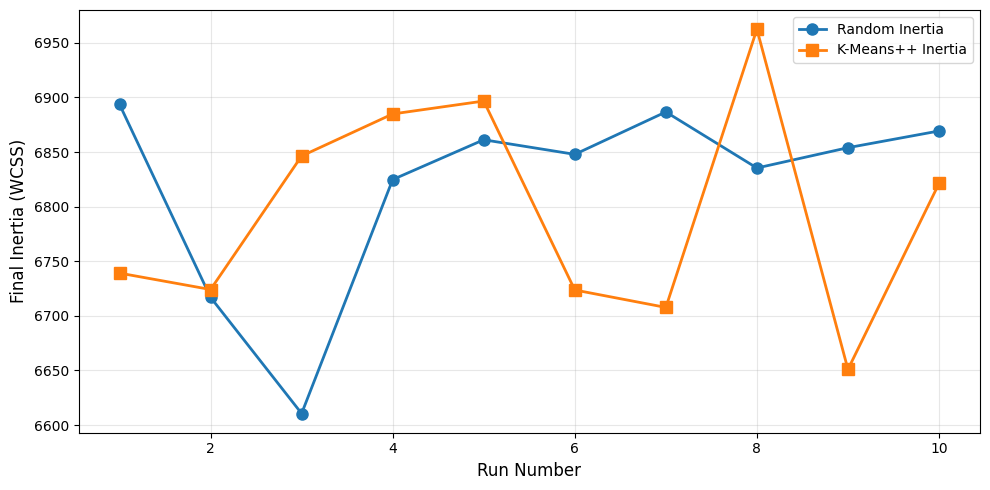

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_inertia)+1), random_inertia, 'o-', label='Random Inertia', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_inertia)+1), plusplus_inertia, 's-', label='K-Means++ Inertia', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Final Inertia (WCSS)', fontsize=12)
# plt.title(f'Comparison of Inertia per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

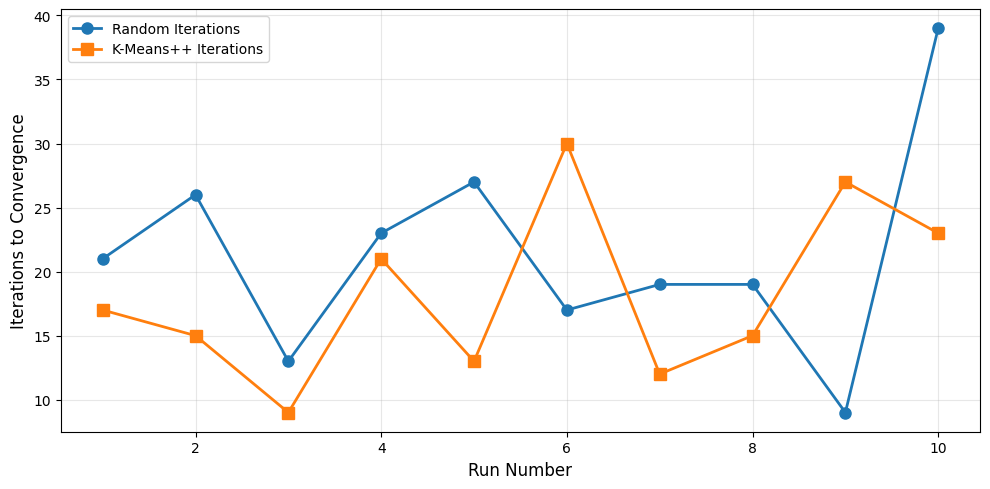

In [227]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_iters)+1), random_iters, 'o-', label='Random Iterations', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_iters)+1), plusplus_iters, 's-', label='K-Means++ Iterations', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Iterations to Convergence', fontsize=12)
# plt.title(f'Comparison of Iterations per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

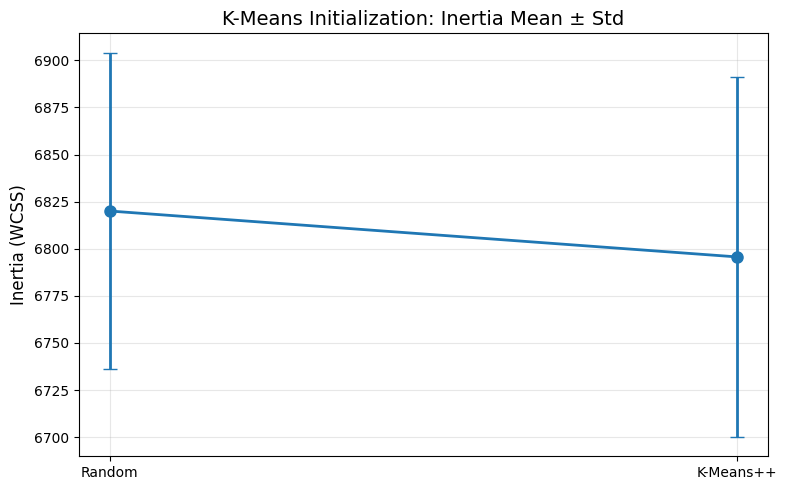

In [228]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, inertia_means, yerr=inertia_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('K-Means Initialization: Inertia Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

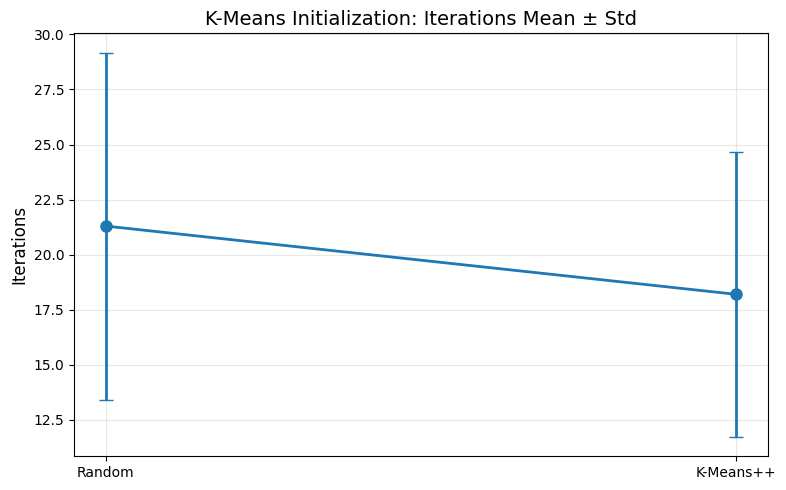

In [229]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, iters_means, yerr=iters_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Iterations', fontsize=12)
plt.title('K-Means Initialization: Iterations Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [230]:
k_vals = list(range(2, 11))
sklearn_inertias = []

print("Running sklearn K-Means:\n")

for K in k_vals:
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    
    kmeans.fit(X_scaled)
    sklearn_inertias.append(kmeans.inertia_)
    
    print(f"K = {K}: Inertia = {kmeans.inertia_:.4f}")


Running sklearn K-Means:

K = 2: Inertia = 11595.5266
K = 3: Inertia = 10061.7978
K = 4: Inertia = 9258.9891
K = 5: Inertia = 8558.6607
K = 6: Inertia = 7970.2638
K = 7: Inertia = 7540.3187
K = 8: Inertia = 7254.3262
K = 9: Inertia = 6837.6289
K = 10: Inertia = 6603.4044


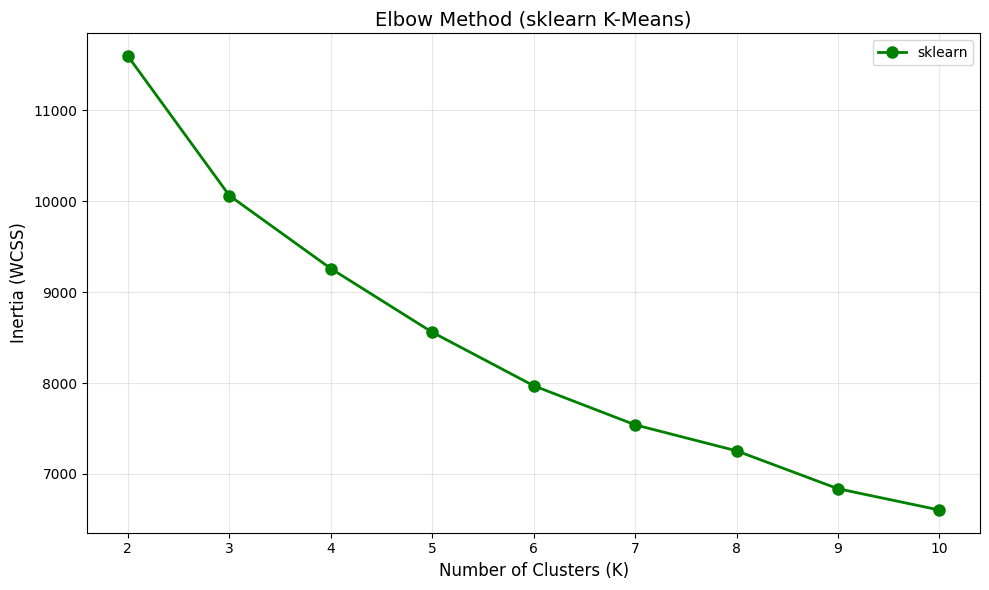

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, sklearn_inertias, 'go-', linewidth=2, markersize=8, label='sklearn')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method (sklearn K-Means)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


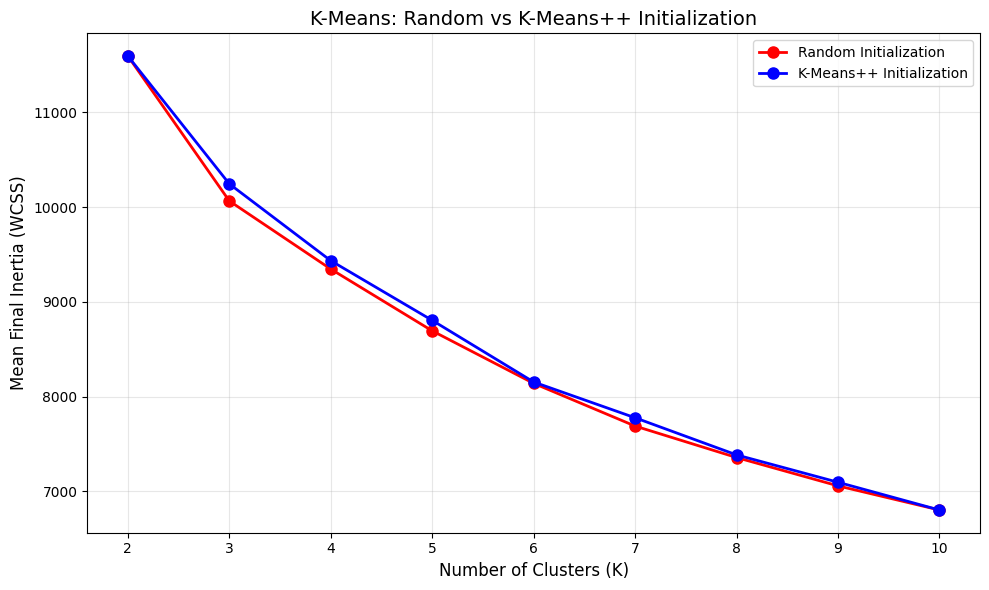

In [232]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, inertia_means_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ Initialization', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [233]:
# Store mean inertias for each K
mean_inertia_random = []
mean_inertia_plusplus = []
diff_random = []
diff_plusplus = []

for i, K in enumerate(k_vals):
    # Compute mean inertia from your multiple runs (replace with your actual mean lists)
    mean_r = inertia_means_random[i]
    mean_p = inertia_means_plusplus[i]

    # Compute differences from sklearn KMeans
    diff_r = abs(mean_r - sklearn_inertias[i])
    diff_p = abs(mean_p - sklearn_inertias[i])

    # Store in lists
    mean_inertia_random.append(mean_r)
    mean_inertia_plusplus.append(mean_p)
    diff_random.append(diff_r)
    diff_plusplus.append(diff_p)

    print(
        f"K={K}: Scratch Random={mean_r:.4f}, "
        f"Scratch K-Means++={mean_p:.4f}, "
        f"sklearn={sklearn_inertias[i]:.4f}, "
        f"Diff Random={diff_r:.4f}, "
        f"Diff K-Means++={diff_p:.4f}"
    )

K=2: Scratch Random=11595.6667, Scratch K-Means++=11595.6363, sklearn=11595.5266, Diff Random=0.1401, Diff K-Means++=0.1097
K=3: Scratch Random=10065.6934, Scratch K-Means++=10245.8772, sklearn=10061.7978, Diff Random=3.8956, Diff K-Means++=184.0794
K=4: Scratch Random=9346.5566, Scratch K-Means++=9435.0063, sklearn=9258.9891, Diff Random=87.5675, Diff K-Means++=176.0172
K=5: Scratch Random=8694.1385, Scratch K-Means++=8805.0105, sklearn=8558.6607, Diff Random=135.4779, Diff K-Means++=246.3498
K=6: Scratch Random=8139.6615, Scratch K-Means++=8154.0405, sklearn=7970.2638, Diff Random=169.3977, Diff K-Means++=183.7767
K=7: Scratch Random=7688.8213, Scratch K-Means++=7776.4593, sklearn=7540.3187, Diff Random=148.5026, Diff K-Means++=236.1406
K=8: Scratch Random=7356.5559, Scratch K-Means++=7384.4747, sklearn=7254.3262, Diff Random=102.2297, Diff K-Means++=130.1485
K=9: Scratch Random=7057.3524, Scratch K-Means++=7095.6230, sklearn=6837.6289, Diff Random=219.7235, Diff K-Means++=257.9941
K

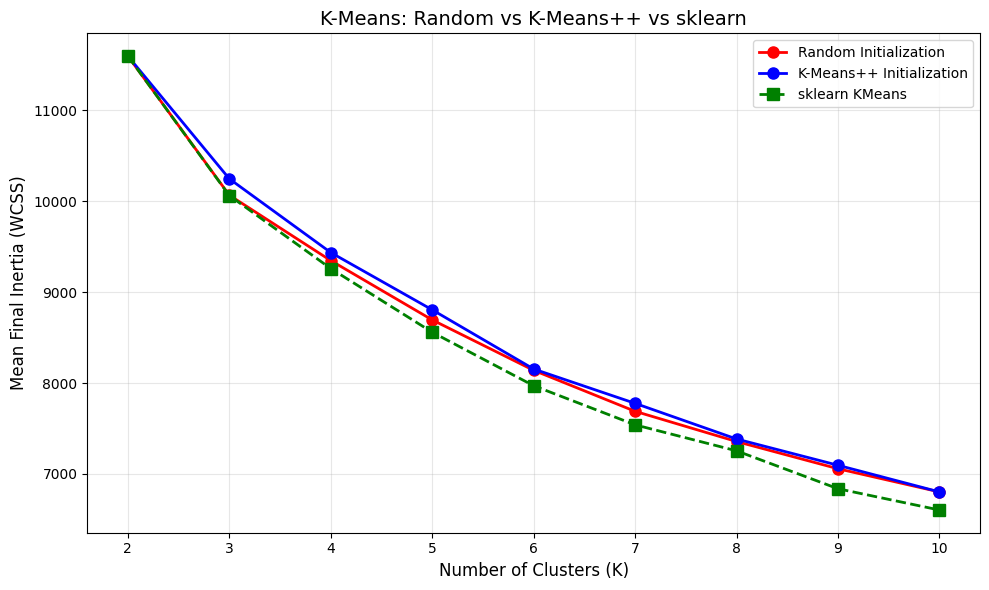

In [234]:

# Visualization
plt.figure(figsize=(10,6))
plt.plot(k_vals, mean_inertia_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, mean_inertia_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.plot(k_vals, sklearn_inertias, 'gs--', linewidth=2, markersize=8, label='sklearn KMeans')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ vs sklearn', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.Gaussian Mixture Models (GMM)


In [235]:
def log_multivariate_normal(X, mean, cov):
    d = X.shape[1]
    cov += np.eye(d) * 1e-6 
    sign, logdet = np.linalg.slogdet(cov)
    inv_cov = np.linalg.inv(cov)
    diff = X - mean
    return -0.5 * (d * np.log(2 * np.pi) + logdet + np.sum(diff @ inv_cov * diff, axis=1))

In [236]:
class GMM:
    def __init__(self, n_components, covariance_type='full', max_iter=100, tol=1e-4):
        self.K = n_components
        self.covariance_type = covariance_type
        self.max_iter = max_iter
        self.tol = tol

    def _initialize(self, X):
        N, D = X.shape
        self.pi = np.ones(self.K) / self.K
        self.mu = X[np.random.choice(N, self.K, replace=False)]

        if self.covariance_type == 'tied':
            self.cov = np.cov(X.T) + np.eye(D) * 1e-6
        elif self.covariance_type == 'diagonal':
            var = np.var(X, axis=0)
            self.cov = np.array([np.maximum(var, 1e-6) for _ in range(self.K)])
        elif self.covariance_type == 'spherical':
            var = np.mean(np.var(X, axis=0))
            self.cov = np.array([max(var, 1e-6) for _ in range(self.K)])
        else:  # full
            cov_matrix = np.cov(X.T) + np.eye(D) * 1e-6
            self.cov = np.array([cov_matrix for _ in range(self.K)])

    def _e_step(self, X):
        N, D = X.shape
        log_resp = np.zeros((N, self.K))
        for k in range(self.K):
            if self.covariance_type == 'spherical':
                cov = np.eye(D) * self.cov[k]
            elif self.covariance_type == 'diagonal':
                cov = np.diag(self.cov[k])
            elif self.covariance_type == 'tied':
                cov = self.cov
            else:  # full
                cov = self.cov[k]
            log_resp[:, k] = np.log(self.pi[k]) + log_multivariate_normal(X, self.mu[k], cov)
        log_sum = np.logaddexp.reduce(log_resp, axis=1)
        self.log_likelihood = np.sum(log_sum)
        resp = np.exp(log_resp - log_sum[:, None])
        return resp

    def _m_step(self, X, resp):
        N, D = X.shape
        Nk = resp.sum(axis=0)
        self.pi = Nk / N
        self.mu = (resp.T @ X) / Nk[:, None]

        if self.covariance_type == 'tied':
            cov = np.zeros((D, D))
            for k in range(self.K):
                diff = X - self.mu[k]
                cov += (resp[:, k][:, None] * diff).T @ diff
            self.cov = cov / N + np.eye(D) * 1e-6

        elif self.covariance_type == 'full':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                cov = (weighted.T @ diff) / Nk[k] + np.eye(D) * 1e-6
                covs.append(cov)
            self.cov = np.array(covs)

        elif self.covariance_type == 'diagonal':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.sum(weighted * diff, axis=0) / Nk[k]  # (D,)
                var = np.maximum(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,D), keep as vector

        elif self.covariance_type == 'spherical':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.trace((weighted.T @ diff) / Nk[k]) / X.shape[1]  # scalar
                var = max(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,), keep as scalar


    def fit(self, X):
        self._initialize(X)
        self.log_likelihood_history = []   
        prev_ll = None
        self.n_iter = 0

        for i in range(self.max_iter):
            resp = self._e_step(X)
            self._m_step(X, resp)

            self.log_likelihood_history.append(self.log_likelihood)  
            self.n_iter += 1

            if prev_ll is not None and abs(self.log_likelihood - prev_ll) < self.tol:
                break
            prev_ll = self.log_likelihood



    def predict(self, X):
        resp = self._e_step(X)
        return np.argmax(resp, axis=1)


In [237]:
def map_clusters_to_labels(y_true, y_cluster):
    y_pred = np.zeros_like(y_cluster)
    for c in np.unique(y_cluster):
        mask = (y_cluster == c)
        y_pred[mask] = np.bincount(y_true[mask]).argmax()
    return y_pred

In [238]:
def compute_gmm_params(n_components, n_features, cov_type):
    # mixture weights
    params = n_components - 1

    # means
    params += n_components * n_features

    if cov_type == 'full':
        params += n_components * (n_features * (n_features + 1) // 2)
    elif cov_type == 'tied':
        params += (n_features * (n_features + 1) // 2)
    elif cov_type == 'diagonal':
        params += n_components * n_features
    elif cov_type == 'spherical':
        params += n_components

    return params


In [239]:
def compute_aic_bic(log_likelihood, n_params, n_samples):
    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n_samples) - 2 * log_likelihood
    return aic, bic


In [240]:
covariance_types = ['full', 'tied', 'diagonal', 'spherical']
n_components_range = range(1, 7) 
gmm_results = []
n_samples, n_features = X_scaled.shape

for cov_type in covariance_types:
    for k in n_components_range:
        print(f"Running GMM: cov={cov_type}, components={k}")

        gmm = GMM(
            n_components=k,
            covariance_type=cov_type,
            max_iter=200,
            tol=1e-4
        )

        gmm.fit(X_scaled)

        log_likelihood = gmm.log_likelihood
        n_params = compute_gmm_params(k, n_features, cov_type)

        aic, bic = compute_aic_bic(
            log_likelihood=log_likelihood,
            n_params=n_params,
            n_samples=n_samples
        )

        gmm_results.append({
            "covariance": cov_type,
            "components": k,
            "log_likelihood": log_likelihood,
            "AIC": aic,
            "BIC": bic,
            "iterations": gmm.n_iter
        })

Running GMM: cov=full, components=1
Running GMM: cov=full, components=2
Running GMM: cov=full, components=3
Running GMM: cov=full, components=4
Running GMM: cov=full, components=5
Running GMM: cov=full, components=6
Running GMM: cov=tied, components=1
Running GMM: cov=tied, components=2
Running GMM: cov=tied, components=3
Running GMM: cov=tied, components=4
Running GMM: cov=tied, components=5
Running GMM: cov=tied, components=6
Running GMM: cov=diagonal, components=1
Running GMM: cov=diagonal, components=2
Running GMM: cov=diagonal, components=3
Running GMM: cov=diagonal, components=4
Running GMM: cov=diagonal, components=5
Running GMM: cov=diagonal, components=6
Running GMM: cov=spherical, components=1
Running GMM: cov=spherical, components=2
Running GMM: cov=spherical, components=3
Running GMM: cov=spherical, components=4
Running GMM: cov=spherical, components=5
Running GMM: cov=spherical, components=6


In [241]:
import pandas as pd

df = pd.DataFrame(gmm_results)

print("\n===== Best Model per Covariance (by BIC) =====")
print(df.loc[df.groupby("covariance")["BIC"].idxmin()]
      [["covariance", "components", "BIC", "log_likelihood", "iterations"]])



===== Best Model per Covariance (by BIC) =====
   covariance  components           BIC  log_likelihood  iterations
16   diagonal           5  32059.509688   -15065.485018          51
4        full           5   9954.164044     2886.157776          83
23  spherical           6  35096.110714   -16942.214776         117
9        tied           4  10913.779191    -3591.788748          40


In [242]:
best = df.loc[df["BIC"].idxmin()]

best_gmm = GMM(
    n_components=int(best["components"]),
    covariance_type=best["covariance"],
    max_iter=200,
    tol=1e-4
)

best_gmm.fit(X_scaled)


In [243]:
clusters = best_gmm.predict(X_scaled)
y_pred = map_clusters_to_labels(y_binary, clusters)

accuracy = np.mean(y_pred == y_binary)
print(f"\nEvaluation Accuracy (after model selection): {accuracy:.4f}")



Evaluation Accuracy (after model selection): 0.8928


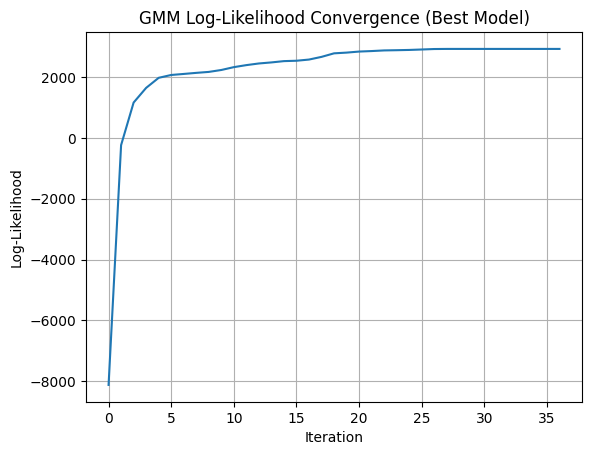

In [244]:
plt.figure()
plt.plot(best_gmm.log_likelihood_history)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("GMM Log-Likelihood Convergence (Best Model)")
plt.grid(True)
plt.show()


# Experiments

Experiment 1: K-Means on original data

Experiment 2: GMM on original data

Experiment 3: K-Means after PCA

Experiment 4: GMM after PCA

In [245]:
pca_dims = [2, 5, 10, 15, 20]

cov_types = ['full', 'tied', 'diagonal', 'spherical']
gmm_pca_results = []

for n_dim in pca_dims:
    # Apply PCA
    pca = PCA(n_components=n_dim)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    recon_error = pca.reconstruction_error(X_scaled)
    
    for cov_type in cov_types:
        for k in range(1, 7):  # number of GMM components
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
            gmm.fit(X_pca)
            
            log_likelihood = gmm.log_likelihood
            n_params = compute_gmm_params(k, n_dim, cov_type)
            aic, bic = compute_aic_bic(log_likelihood, n_params, X_pca.shape[0])
            
            gmm_pca_results.append({
                "pca_dim": n_dim,
                "reconstruction_error": recon_error,
                "covariance": cov_type,
                "components": k,
                "log_likelihood": log_likelihood,
                "AIC": aic,
                "BIC": bic,
                "iterations": gmm.n_iter
            })

df_gmm_pca = pd.DataFrame(gmm_pca_results)
# Find best model per PCA dimension by BIC
best_per_dim = df_gmm_pca.loc[df_gmm_pca.groupby("pca_dim")["BIC"].idxmin()]
print(best_per_dim[["pca_dim","reconstruction_error","covariance","components","BIC","log_likelihood"]])

     pca_dim  reconstruction_error covariance  components           BIC  \
20         2              0.367568  spherical           3   5407.198611   
27         5              0.152657       full           4  11142.089530   
64        10              0.048431   diagonal           5  17142.287749   
87        15              0.013512   diagonal           4  19971.555136   
111       20              0.004428   diagonal           4  18819.045481   

     log_likelihood  
20     -2668.707963  
27     -5307.773727  
64     -8241.262092  
87     -9595.628921  
111    -8892.496485  


Experiment 5: K-Means after Autoencoder

Experiment 6: GMM after Autoencoder

In [246]:
bottleneck_sizes = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diagonal', 'spherical']
gmm_ae_results = []

for bottleneck in bottleneck_sizes:
    print(f"Training Autoencoder with bottleneck={bottleneck}")
    layer_sizes = [X_scaled.shape[1], 30, 20, bottleneck, 20, 30, X_scaled.shape[1]]
    ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=200, batch_size=32)
    
    # Extract bottleneck features
    X_ae = ae.forward(X_scaled)
    
    # Compute reconstruction error
    recon_error = np.mean((X_scaled - X_ae) ** 2)
    
    # Run GMM on bottleneck features
    for cov_type in cov_types:
        for k in range(1, 7):
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
            gmm.fit(X_ae)
            
            log_likelihood = gmm.log_likelihood
            n_params = compute_gmm_params(k, bottleneck, cov_type)
            aic, bic = compute_aic_bic(log_likelihood, n_params, X_ae.shape[0])
            
            gmm_ae_results.append({
                "bottleneck": bottleneck,
                "reconstruction_error": recon_error,
                "covariance": cov_type,
                "components": k,
                "log_likelihood": log_likelihood,
                "AIC": aic,
                "BIC": bic,
                "iterations": gmm.n_iter
            })

df_gmm_ae = pd.DataFrame(gmm_ae_results)
best_per_bottleneck = df_gmm_ae.loc[df_gmm_ae.groupby("bottleneck")["BIC"].idxmin()]
print("\n===== Best GMM per Autoencoder Bottleneck (by BIC) =====")
print(best_per_bottleneck[["bottleneck", "reconstruction_error", "covariance", "components", "BIC", "log_likelihood"]])

# Merge PCA and Autoencoder results
comparison = pd.merge(
    best_per_dim[['pca_dim', 'reconstruction_error', 'covariance', 'components', 'BIC']],
    best_per_bottleneck[['bottleneck', 'reconstruction_error', 'covariance', 'components', 'BIC']],
    left_on='pca_dim', right_on='bottleneck',
    suffixes=('_PCA', '_AE')
)

Training Autoencoder with bottleneck=2
Epoch 0, Loss: 1.00000
Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.00000
Epoch 180, Loss: 1.00000
Epoch 190, Loss: 1.00000
Training Autoencoder with bottleneck=5
Epoch 0, Loss: 1.00000
Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.